In [11]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [12]:
# STEP 2: Load your dataset
df = pd.read_csv("800-Row_Simulated_ML_Dataset.csv")  # Update filename as needed
df['reviewer_std_dev_error'] = df['reviewer_std_dev_error'].fillna(0.0)

In [13]:
# STEP 3: Define features and target
feature_cols = [
    'reviewer_avg_error_all',
    'reviewer_review_count',
    'reviewer_std_dev_error',
    'reviewer_avg_error_on_assign',
    'reviewer_review_count_on_assign'
]

X = df[feature_cols]
y = df['abs_error']

In [14]:
# STEP 4: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# STEP 5: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [16]:

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [17]:

# STEP 6: Evaluate best model
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Tuned Random Forest MAE: {mae:.2f}")
print(f"✅ Tuned Random Forest R²: {r2:.2f}")
print("🔧 Best Params:", grid_search.best_params_)

✅ Tuned Random Forest MAE: 2.71
✅ Tuned Random Forest R²: 0.10
🔧 Best Params: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


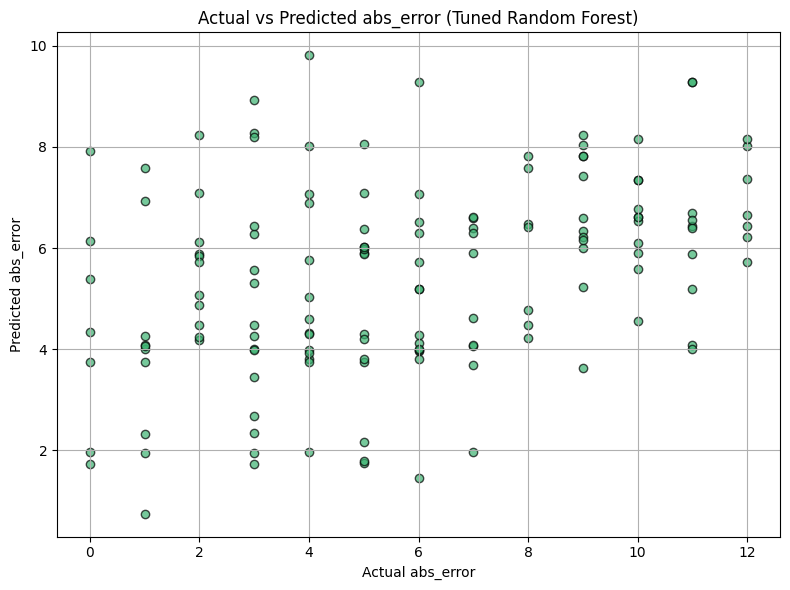

In [18]:
# STEP 7: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='mediumseagreen', edgecolors='k')
plt.xlabel("Actual abs_error")
plt.ylabel("Predicted abs_error")
plt.title("Actual vs Predicted abs_error (Tuned Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()